# Kaggle - House Prices: Advanced Regression Techniques

URL: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In this folder, I will be exploring this project and the dataset on Kaggle.

This notebook is focused on exploring and processing the data.
Analysing the distribution of the Sales Price data.
Exploring the correlation between the numerical features and the price data.
Dealing with missing values, outliers and highly skewed variables.
Creating dummy values for categorical features.

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

# Data Preprocessing

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Y value

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
df['SalePrice'].isna().sum()

0

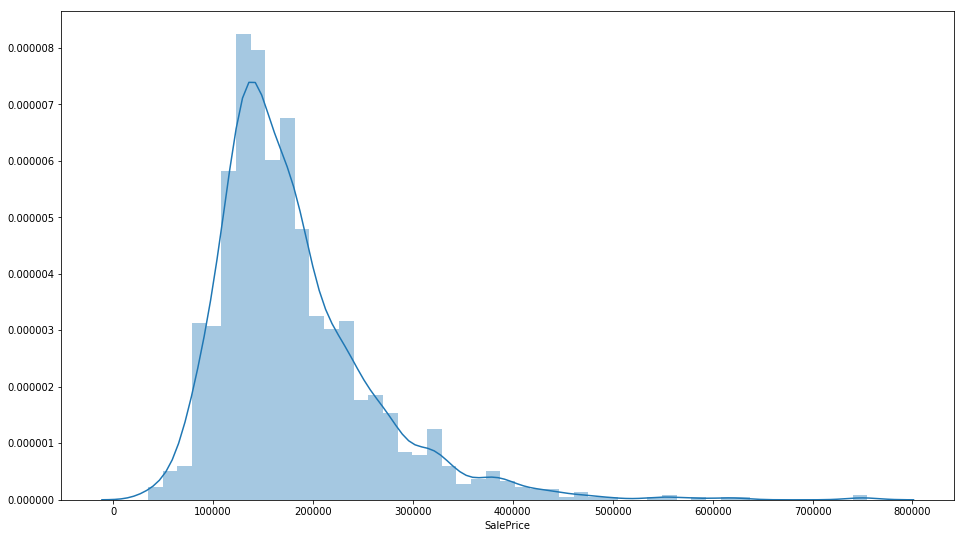

In [9]:
plt.rcParams["figure.figsize"] = [16,9]
se.distplot(df['SalePrice'])

In [10]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The Sales Price data is highly positively skewed (long right tail) and has very heavy tails based on the Kurtosis value. Together with the bar charts, we can clearly see that the sale prices does not follow a normal distribution.

## Numerical Variables

In [11]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
print('Number of numerical columns:', len(df_num.columns))

Number of numerical columns: 38


In [13]:
df_num.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

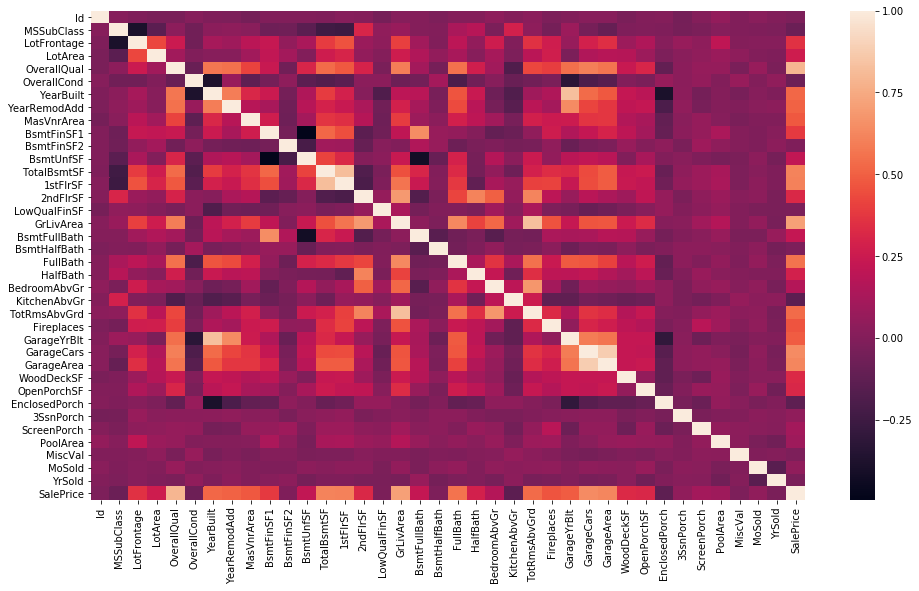

In [14]:
se.heatmap(df_num.corr())

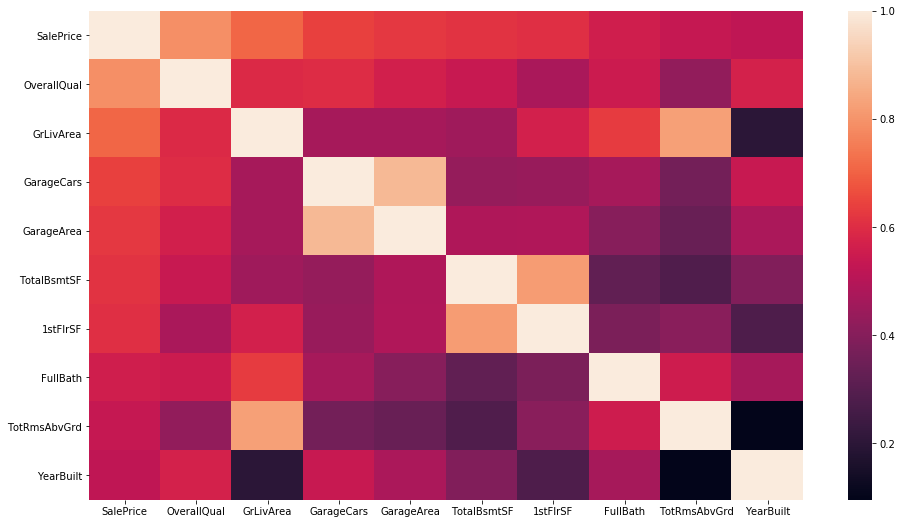

In [15]:
cols = df_num.corr()['SalePrice'].sort_values(ascending=False)[:10].index
se.heatmap(df_num.corr().sort_values(by='SalePrice', ascending=False)[:10][cols])

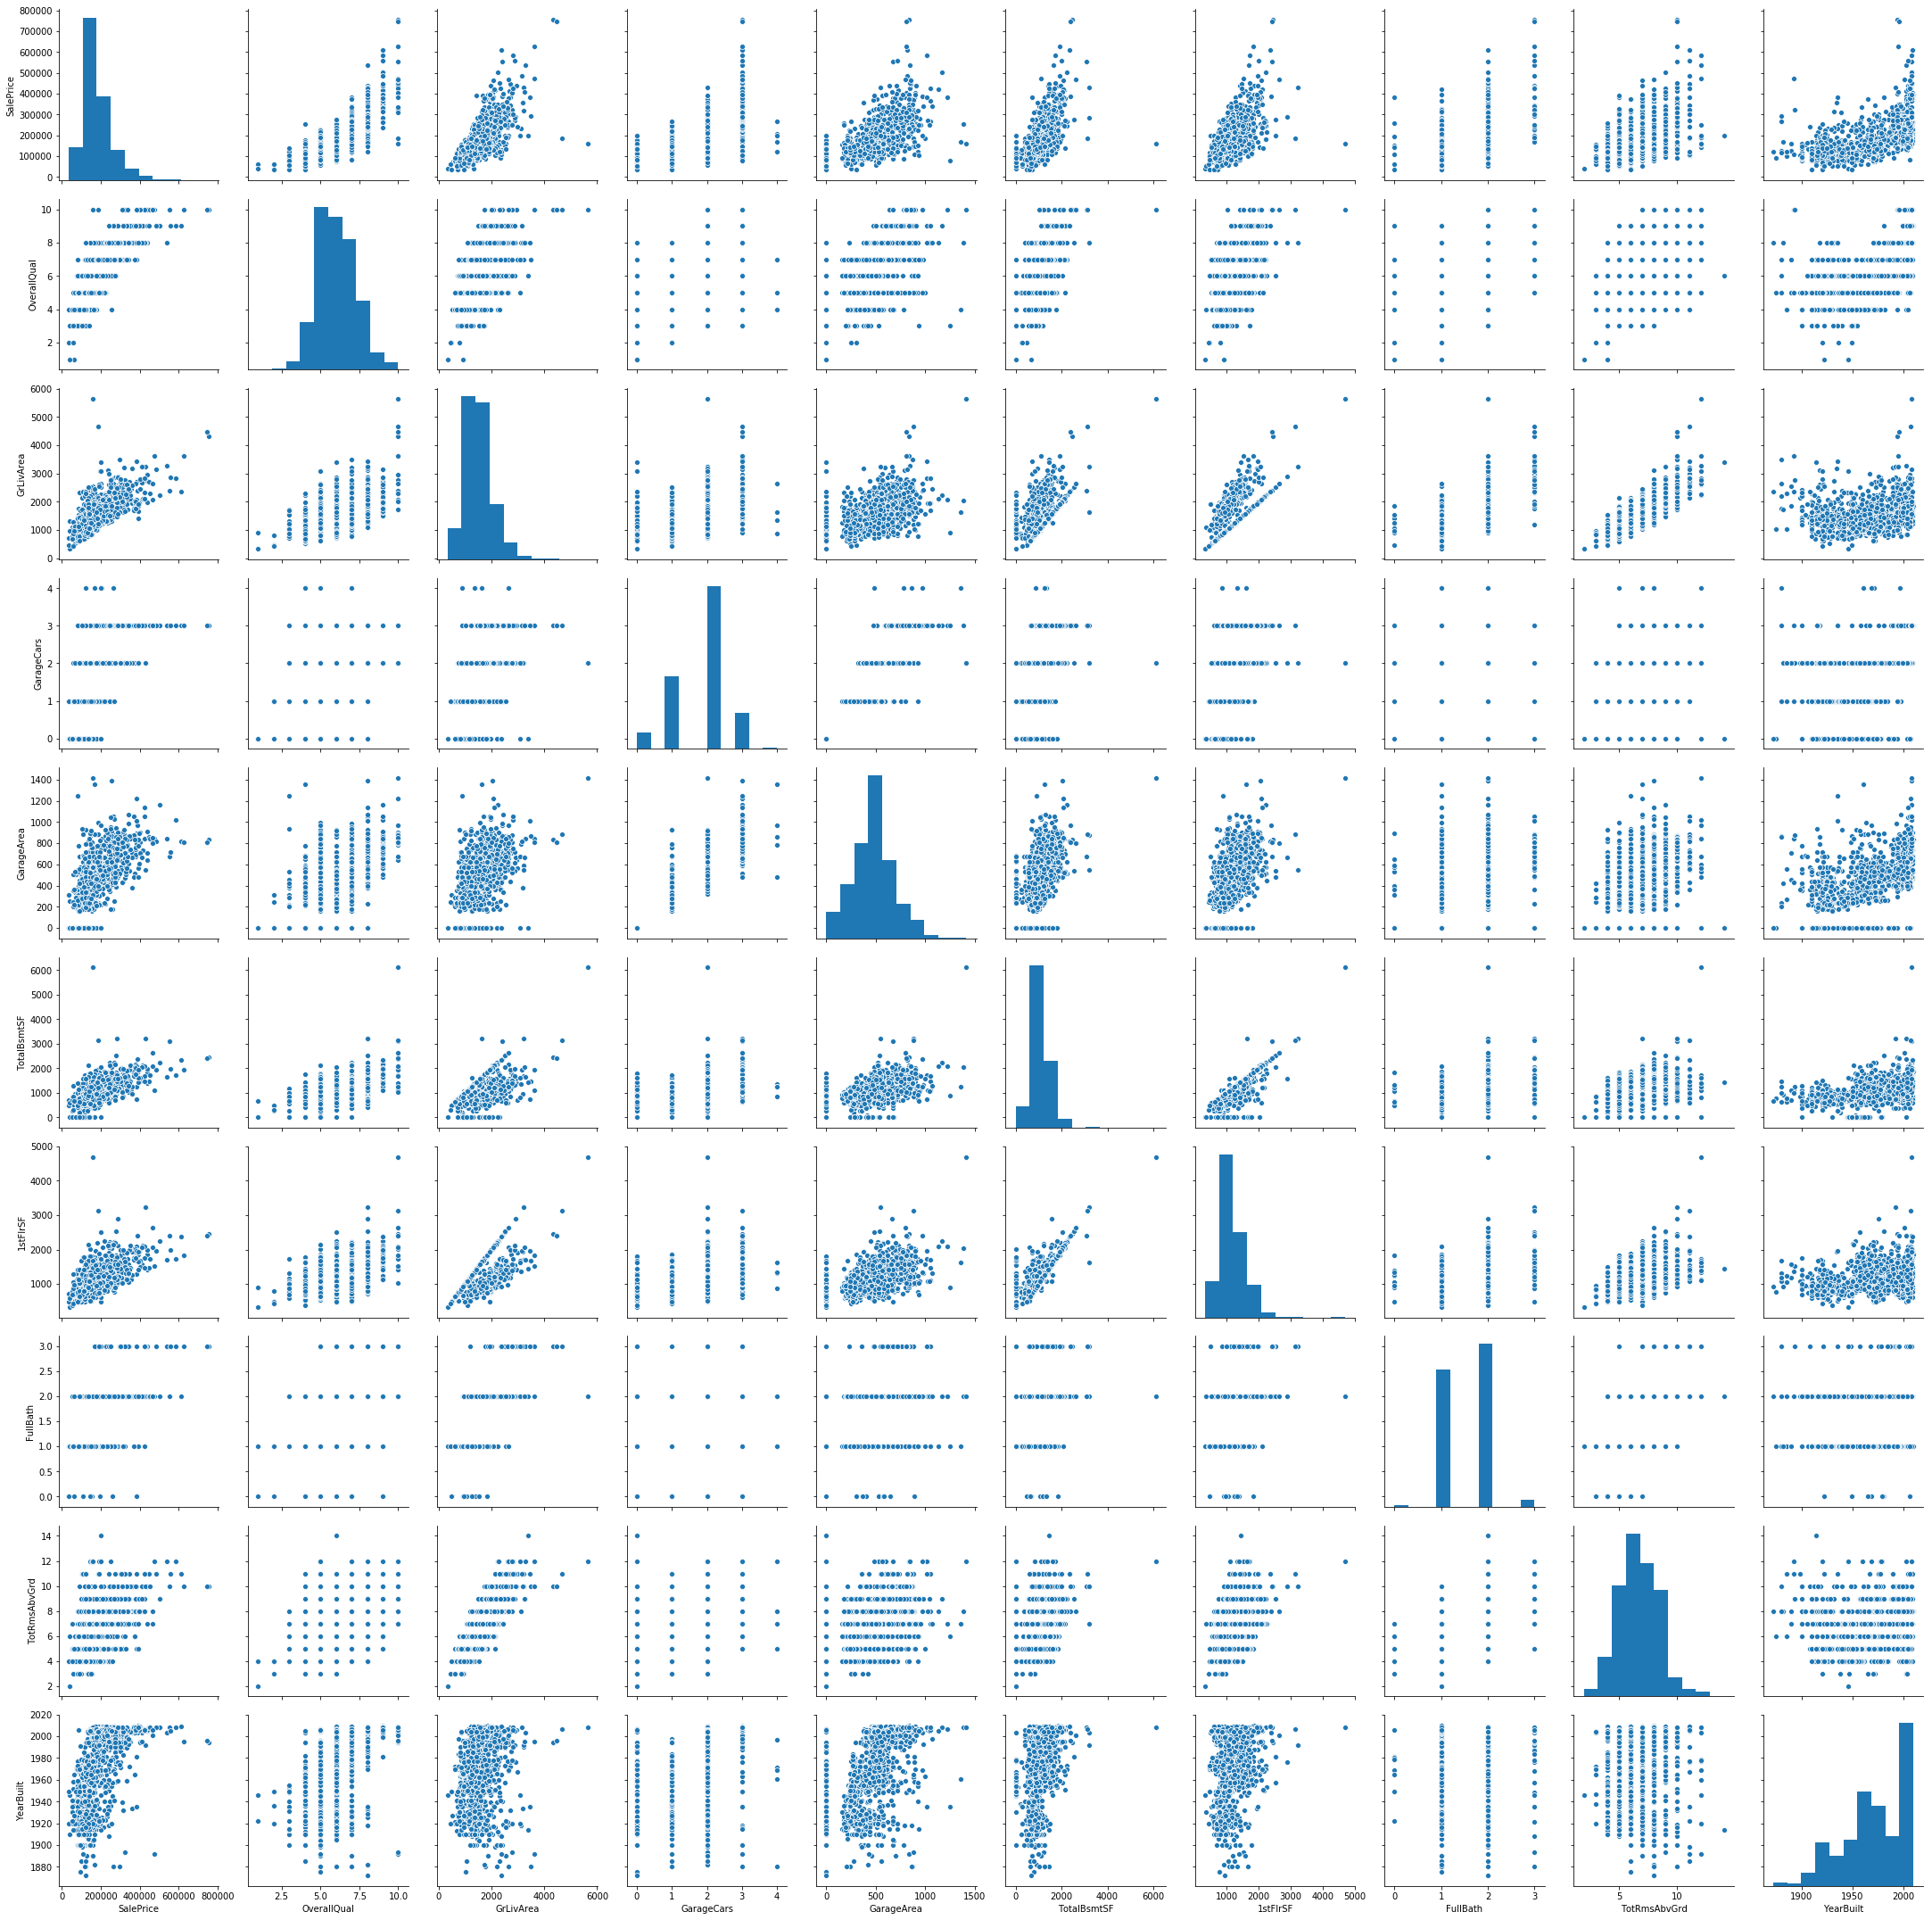

In [16]:
se.pairplot(df[cols], height=3)

## 3 highest Correlated variable with SalePrice

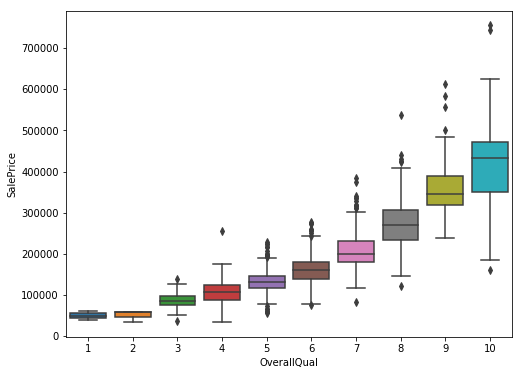

In [17]:
plt.rcParams["figure.figsize"] = [8,6]
se.boxplot(x='OverallQual', y = 'SalePrice', data = df)

General uptrend of sales prices as Overall Quality ratings increases. Variance increases with higher Overall Quality as well.

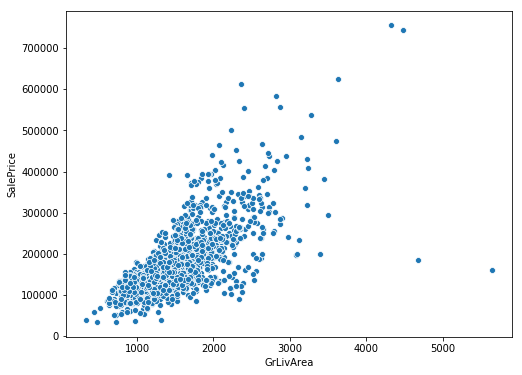

In [18]:
se.scatterplot(x='GrLivArea', y = 'SalePrice', data = df)

Positively correlated but the variance seems to increase as GrLivArea increases.

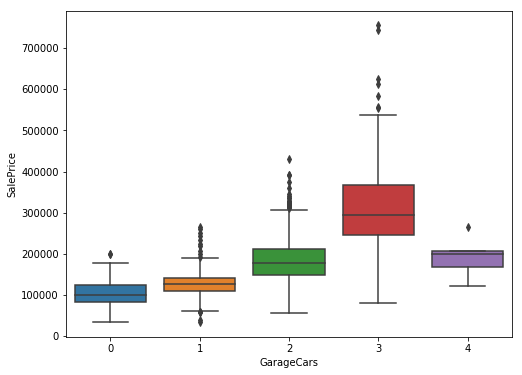

In [19]:
se.boxplot(x='GarageCars', y = 'SalePrice', data=df)

This visualisation shows an interesting finding. It seems that Sale Prices generally increases from 0 to 3 garage cars with 3 having a large variance in prices. However, having 4 Garage Cars does not replicate the same results. This could be due to limited data given it is rare for houses to have space for 4 garage cars or that being able to accomodate 4 garage cars might be too space consuming that it is undesirable. That being said, these reasonings are at best hypotheses without further research.

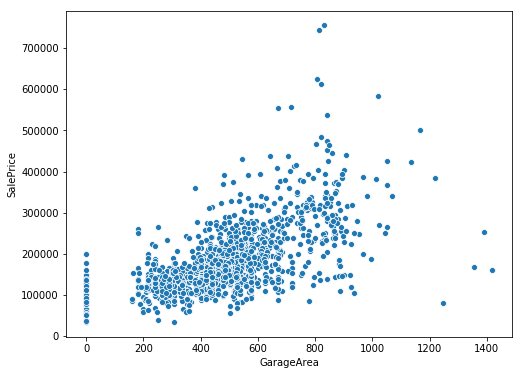

In [20]:
# Using garagearea. Garage Area is highly correlated with Garage Cars. This is proven by their high correlation shown in the correlation matrix.
se.scatterplot(x='GarageArea', y = 'SalePrice', data = df)

This graph shows that there is indeed limited number of houses (data points) with large Garage Areas. We can also observe a strange line forms by the datapoints where GarageArea = 0. This is likely causes by houses that do not contain a garage.

Bonus from Data Exploration tutorial on Kaggle - yearbuilt

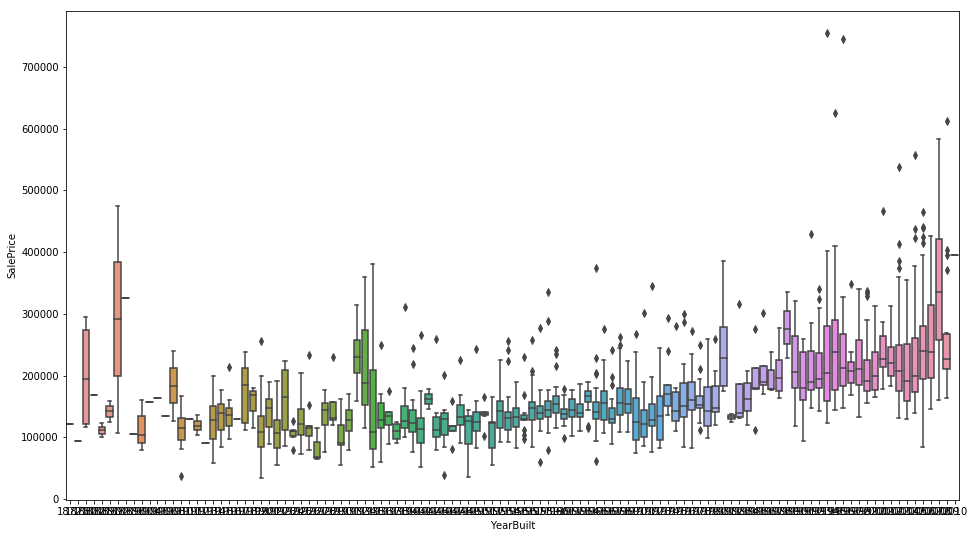

In [21]:
plt.rcParams["figure.figsize"] = [16,9]
se.boxplot(x='YearBuilt', y='SalePrice', data=df)

Its correlation coefficient (0.523) tells us that house built in later years have a higher Sale Price. This relationship is shown by this visualisation as well where prices generally have a slight uptrend. However, we can note that there are certain years where the Sale Prices houses built then have a higher price variation.

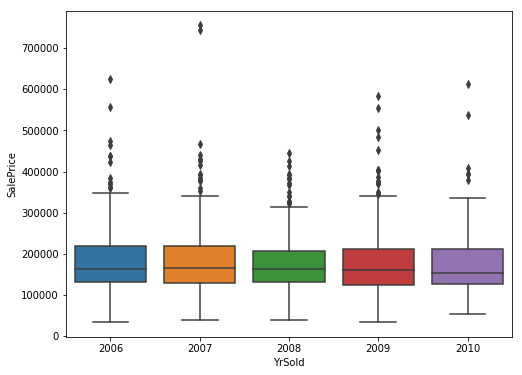

In [22]:
plt.rcParams["figure.figsize"] = [8,6]
se.boxplot(x='YrSold', y='SalePrice', data=df)

Although the year in which the house was built on might have some predictive relationship with its sale price, it seems that we cannot say the same for the year when the hosue is being sold.

In [23]:
df_num_na_val = df_num.isna().sum().sort_values(ascending=False)
df_num_na = df_num_na_val[df_num_na_val!= 0]
df_num_na

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [24]:
df_num_na/df_num[df_num_na.index].isnull().count()

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
dtype: float64

In order to decide what we should do with columns with missing data, we have to consider whether they are significant to our model and as such, will excluding them leave out important information. Since LotFrontage have a significant amount of missing data and that it and MasVnrArea doesn't seem to be critical to house prices, we can exclude them. As GarageYrBlt is correlated with YrBuilt that will be included. Thus, we can exclude it safely.

In [25]:
df = df.drop(df_num_na.index, axis=1)

## Dealing with categorical data

In [26]:
df_objs = df.select_dtypes(include=['object'])
df_objs.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [27]:
print('Number of Categorical Data:', len(df_objs.columns))

Number of Categorical Data: 43


In [33]:
df_objs.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
SaleCondition     6
BsmtFinType2      6
Heating           6
Foundation        6
GarageType        6
RoofStyle         6
BsmtFinType1      6
ExterCond         5
BldgType          5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
FireplaceQu       5
LotShape          4
LandContour       4
MiscFeature       4
Fence             4
BsmtExposure      4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
GarageFinish      3
PavedDrive        3
PoolQC            3
LandSlope         3
Utilities         2
CentralAir        2
Alley             2
Street            2
dtype: int64

In [29]:
df_obs_na_val = df_objs.isna().sum().sort_values(ascending=False)
df_obs_na = df_obs_na_val[df_obs_na_val!=0]
df_obs_na

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
dtype: int64

In [30]:
df_obs_na/ df_objs[df_obs_na.index].isnull().count()

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtQual        0.025342
BsmtCond        0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Firstly, we remove the variables with a high percentage of missing values (PoolQC, MiscFeature, Alley, Fence and FireplaceQu) purely due to the fact that it is not feasible/accurate to fill them with dummy values regardless of their importance towards the prediction of house prices.

In [31]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

As for the rest of the variables, we can generalise them into descriptions/ characteristics of the garage, basement, masonry veneer and electrical. Since the garage and basement can be important features in a home purchase, these variables can hold important information and should not be simply excluded. As such, when deciding on whether to exclude the variables, we look deeper into the feasibility of filling them with accuracy dummy values or whether there are other highly correlated fields already included in the dataset without as much/ any missing values.
We found that there were variables that have already covered the important information of the Garage, such as the GarageCars, and the Basement, such as TotalbsmtSF. These variables are likely to have a higher impact towards the sale prices and it is also probable that they are serially correlated with the variables with missing data. As such, we will not be losing significant information if we exclude them.
As for the final 2 variables, we will simply remove the rows with missing data given their low percentage.

In [37]:
df = df.drop(df_obs_na.index.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'Electrical', 'MasVnrType']), axis = 1).drop(df[df['MasVnrType'].isna()].index, axis=0).drop(df[df['Electrical'].isna()].index, axis=0)

In [38]:
df.isna().sum().sum()

0

## Outliers

From the scatterplots we see before, we can identify few datapoints that were isolated from the rest. As such, we run a simply z-score to identify some of these points.

In [39]:
from scipy import stats

In [40]:
df_num = df_num.drop(df_num_na.index, axis=1)

In [41]:
z = np.abs(stats.zscore(df_num))
print(len(np.where(z>3)[0]))
print(len(np.where(z>4)[0]))
print(len(np.where(z>5)[0]))
print(len(np.where(z>6)[0]))

639
240
102
77


In [42]:
np.where(z>3)[1]

array([16, 27, 28, 27, 20,  1, 20, 20,  8, 16, 26, 16, 16, 20, 16, 29,  1,
       20, 16, 13,  8,  2, 15, 19, 25, 28, 34, 25,  7, 29, 20, 20, 29,  4,
       13,  1, 16, 20, 20, 29,  8,  8, 16, 14, 28,  1, 13, 16, 28,  9, 20,
       19, 20,  8, 27, 28,  1, 20,  8, 22, 25, 25, 13, 16, 29,  7, 24, 34,
       28,  4, 13, 14, 21, 26, 29, 34, 28, 15, 18, 20, 19, 29,  4, 29, 13,
       14, 16, 27, 30, 13, 16, 28, 16, 16,  4, 16,  9, 10, 11,  8, 28,  4,
       16,  1, 20,  2, 16,  4, 16,  8, 16, 28,  8, 27,  8, 13, 13,  8,  8,
        9, 28, 29,  1, 19, 26, 29, 16, 18, 16,  1,  4,  5, 12, 14, 27, 22,
        1, 29,  2,  8, 15, 16, 27,  8, 27, 15, 27, 16, 19, 20, 10,  1,  2,
       15, 25, 29, 20, 25, 31, 34, 29, 16,  8, 25, 16, 27, 29, 29, 27, 29,
       16,  3,  4,  4, 27,  2, 34,  4, 29, 13,  1,  8, 16, 15, 20, 16, 16,
       29,  8, 10, 11, 34, 20,  8,  2, 15, 20,  2, 27,  4, 27,  8, 29, 34,
       29,  9, 25,  1, 20,  8, 26,  9, 10, 11, 14, 27, 34, 16, 26, 16, 20,
        4, 31,  4,  1, 20

From the results above, we can see that the columns containing the outlier for each row tend to differ throughout. This is likely due to different houses emphasizing on different portions of their apartment based on their preference or the initial designers' preference. As it would be detrimental to remove such a large number of data points from our dataset, we keep the rows for the time being.
However, we are able to reduce the impact of the outliers by applying a log to the data that are highly skewed.

In [77]:
def skew(df):
    return df.skew()

In [63]:
df_num = df_num.set_index('Id')

In [101]:
skewness = df_num.apply(lambda x: skew(x))
print(len(skewness[abs(skewness)>0.5]))

27


In [102]:
df_skew = np.log1p(df_num[skewness[abs(skewness)>0.5].index])
df_skewness = df_skew.apply(lambda x: skew(x)).sort_values(ascending=False)
print(len(df_skewness[abs(df_skewness) > 0.5]))

15


In [104]:
df[skewness[abs(skewness)>0.5].index] = df_skew

## Dummy Variables

Our last step would be to convert our categorical variables using dummy variables.

In [43]:
df = pd.get_dummies(df)

In [109]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,1,0
1,2,4.110874,9.042040,6,1.791759,7.602900,7.602900,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
2,3,3.044522,9.169623,7,2.197225,7.589336,7.589336,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
3,4,4.110874,9.328212,7,1.791759,7.601902,7.602401,6.188264,0.0,6.075346,...,0,0,0,1,1,0,0,0,0,0
4,5,4.262680,9.164401,8,1.791759,7.557995,7.586296,5.379897,0.0,6.293419,...,0,0,0,1,0,0,0,0,1,0


## Saving as csv

In [108]:
df.to_csv('df_train.csv')

In [112]:
df_num[skewness[abs(skewness)>0.5].index] = df_skew

In [114]:
df_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,4.110874,9.042040,7,1.791759,7.602900,7.602900,6.561031,0.0,5.017280,6.753438,...,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,12.247699
2,3.044522,9.169623,6,2.197225,7.589336,7.589336,6.886532,0.0,5.652489,7.141245,...,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,12.109016
3,4.110874,9.328212,7,1.791759,7.601902,7.602401,6.188264,0.0,6.075346,6.825460,...,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,12.317171
4,4.262680,9.164401,7,1.791759,7.557995,7.586296,5.379897,0.0,6.293419,6.629363,...,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,11.849405
5,4.110874,9.565284,8,1.791759,7.601402,7.601402,6.486161,0.0,6.196444,7.044033,...,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,12.429220


In [121]:
df_num.to_csv('data/df_num.csv')